In [1]:
import pylheV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

In [2]:
#This function calculates the invariant mass of aa.
def massa_invariante(p1,p2, num_eventos):
    
    massa_invariante = []
    
    for i in range(num_eventos):
        mI = 0
        for j in range(4):
            if j == 0:
                tensor = 1
            else:
                tensor = -1
            mI = mI + tensor*((p1[i][j]+p2[i][j])**2)
        massa_invariante.append(np.sqrt(mI))
        

    
    return massa_invariante

In [3]:
def leitor_quadrimomento(file_name):
    p1 = []
    p2 = []

    #This file was generated using the cards.
    num_eventos = pylhe.readNumEvents(file_name)


    for e in pylhe.readLHE(file_name):
        quadrimomento1 = []
        quadrimomento2 = []
        for mu in ['e','px','py','pz']:
            quadrimomento1.append(getattr(e.particles[-1],mu))
            quadrimomento2.append(getattr(e.particles[-2],mu))
        p1.append(quadrimomento1)
        p2.append(quadrimomento2)

    return p1,p2,num_eventos


In [4]:
#This function calculates the transverse momentum of a photon.
def pT(file_name):
   
    p_T = []
    for e in pylheV.readLHE(file_name):
        p_T.append(e.particles[-1].pT())
        p_T.append(e.particles[-2].pT())

    return p_T

In [5]:
#This function calculates the pseudorapidity of a photon.
def pseudorapidity(file_name):
   
    eta = []
    for e in pylheV.readLHE(file_name):
        eta.append(e.particles[-1].pseudorapidity())
        eta.append(e.particles[-2].pseudorapidity())

    return eta

In [6]:
#p p > a a (sqrt(s) = 7 TeV), cross_section = 2.258 pb
p_T = pT('pp2aa_7TeV.lhe')
eta = pseudorapidity('pp2aa_7TeV.lhe') 

#p p > a a without higgs (sqrt(s) = 7 TeV), cross_section = 2.251 pb
p_T = p_T + pT('pp2aa_nH_7TeV.lhe')
eta = eta + pseudorapidity('pp2aa_nH_7TeV.lhe')

#p p > h > a a (sqrt(s) = 7 TeV), cross section = 0.008509 pb
p_T = p_T + pT('pp2h2aa_7TeV.lhe')
eta = eta + pseudorapidity('pp2h2aa_7TeV.lhe')

#p p > a a (sqrt(s) = 8 TeV), cross section =  2.503 pb
p_T = p_T + pT('pp2aa_8TeV.lhe')
eta = eta + pseudorapidity('pp2aa_8TeV.lhe')

#p p > a a without higgs (sqrt(s) = 8 TeV), cross_section = 2.495 pb
p_T = p_T + pT('pp2aa_nH_8TeV.lhe')
eta = eta + pseudorapidity('pp2aa_nH_8TeV.lhe')

#p p > h > a a (sqrt(s) = 8TeV), cross section = 0.01097 pb
p_T = p_T + pT('pp2h2aa_8TeV.lhe')
eta = eta + pseudorapidity('pp2h2aa_8TeV.lhe')


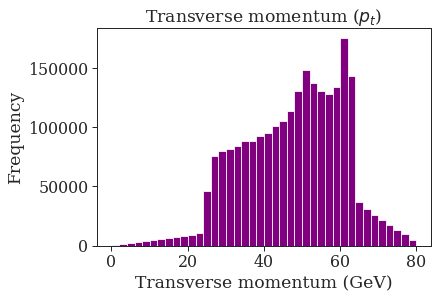

In [7]:
#Plot of the transverse momentum
histogram = plt.hist(p_T, bins = 40, color = 'purple')
plt.title(r'Transverse momentum ($p_t$)')
plt.xlabel(r'Transverse momentum (GeV)')
plt.ylabel('Frequency')
plt.show()

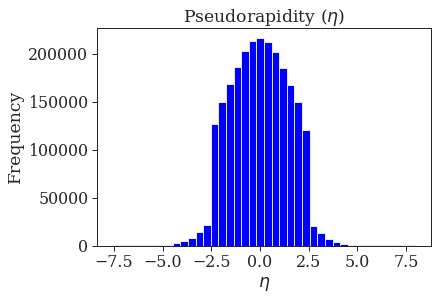

In [8]:
#Plot of pseudorapidity
histogram = plt.hist(eta, bins = 40, color = 'blue')
plt.title(r'Pseudorapidity ($\eta$)')
plt.xlabel(r'$\eta$')
plt.ylabel('Frequency')
plt.show()

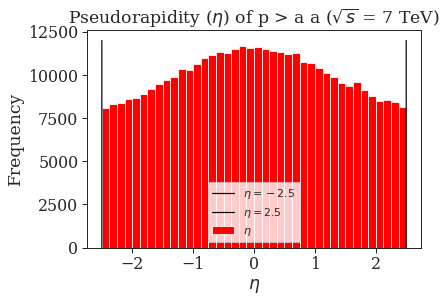

In [24]:
#Pseudorapidity of p > a a (sqrt(s) = 7 TeV), cross_section = 2.258 pb
eta1 = pseudorapidity('pp2aa_7TeV.lhe')

y = np.arange(0,12000,1)
x1 = -2.5 + 0*y
x2 = 2.5 + 0*y
plot = plt.plot(x1,y,  color = 'black', label = r'$\eta = -2.5$')
plot = plt.plot(x2,y,  color = 'black', label = r'$\eta = 2.5$')
histogram = plt.hist(eta1, bins = 40, color = 'red', label = r'$\eta$')
plt.title(r'Pseudorapidity ($\eta$) of p > a a ($\sqrt{s}$ = 7 TeV)')
plt.xlabel(r'$\eta$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

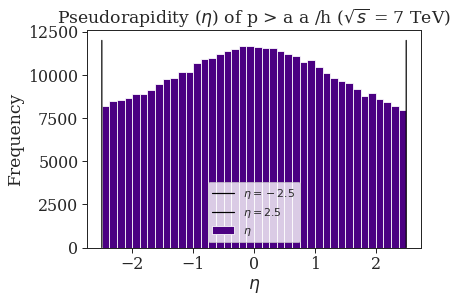

In [25]:
#Pseudorapidity of p p > a a without higgs (sqrt(s) = 7 TeV), cross_section = 2.251 pb
eta1 = pseudorapidity('pp2aa_nH_7TeV.lhe')

y = np.arange(0,12000,1)
x1 = -2.5 + 0*y
x2 = 2.5 + 0*y
plot = plt.plot(x1,y,  color = 'black', label = r'$\eta = -2.5$')
plot = plt.plot(x2,y,  color = 'black', label = r'$\eta = 2.5$')
histogram = plt.hist(eta1, bins = 40, color = 'indigo', label = r'$\eta$')
plt.title(r'Pseudorapidity ($\eta$) of p > a a /h ($\sqrt{s}$ = 7 TeV)')
plt.xlabel(r'$\eta$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

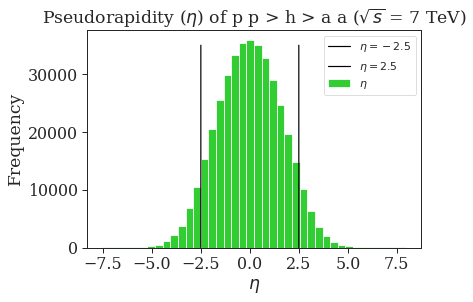

In [26]:
#Pseudorapidity of p p > h > a a (sqrt(s) = 7 TeV), cross section = 0.008509 pb
eta1 = pseudorapidity('pp2h2aa_7TeV.lhe')

y = np.arange(0,35000,1)
x1 = -2.5 + 0*y
x2 = 2.5 + 0*y
plot = plt.plot(x1,y,  color = 'black', label = r'$\eta = -2.5$')
plot = plt.plot(x2,y,  color = 'black', label = r'$\eta = 2.5$')
histogram = plt.hist(eta1, bins = 40, color = 'limegreen', label = r'$\eta$')
plt.title(r'Pseudorapidity ($\eta$) of p p > h > a a ($\sqrt{s}$ = 7 TeV)')
plt.xlabel(r'$\eta$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

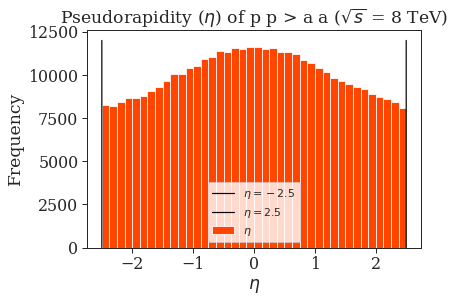

In [27]:
#Pseudorapidity of p p > a a (sqrt(s) = 8 TeV), cross section =  2.503 pb
eta1 = pseudorapidity('pp2aa_8TeV.lhe')

y = np.arange(0,12000,1)
x1 = -2.5 + 0*y
x2 = 2.5 + 0*y
plot = plt.plot(x1,y,  color = 'black', label = r'$\eta = -2.5$')
plot = plt.plot(x2,y,  color = 'black', label = r'$\eta = 2.5$')
histogram = plt.hist(eta1, bins = 40,color = 'orangered', label = r'$\eta$')
plt.title(r'Pseudorapidity ($\eta$) of p p > a a ($\sqrt{s}$ = 8 TeV)')
plt.xlabel(r'$\eta$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

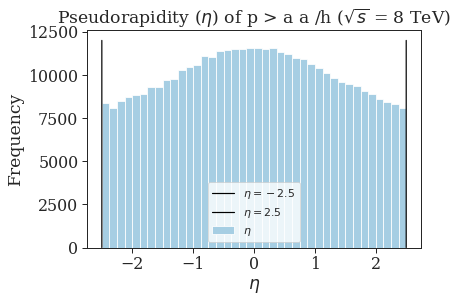

In [28]:
#Pseudorapidity of p p > a a without higgs (sqrt(s) = 8 TeV), cross_section = 2.495 pb
eta1 = pseudorapidity('pp2aa_nH_8TeV.lhe')

y = np.arange(0,12000,1)
x1 = -2.5 + 0*y
x2 = 2.5 + 0*y
plot = plt.plot(x1,y,  color = 'black', label = r'$\eta = -2.5$')
plot = plt.plot(x2,y,  color = 'black', label = r'$\eta = 2.5$')
histogram = plt.hist(eta1, bins = 40, label = r'$\eta$')
plt.title(r'Pseudorapidity ($\eta$) of p > a a /h ($\sqrt{s}$ = 8 TeV)')
plt.xlabel(r'$\eta$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

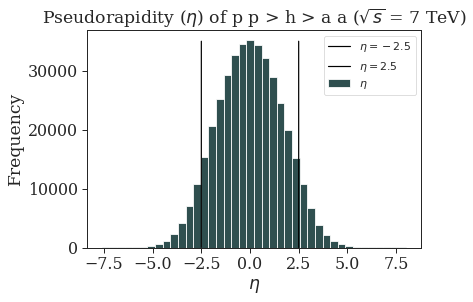

In [29]:
#Pseudorapidity of p p > h > a a (sqrt(s) = 8TeV), cross section = 0.01097 pb
eta1 = pseudorapidity('pp2h2aa_8TeV.lhe')

y = np.arange(0,35000,1)
x1 = -2.5 + 0*y
x2 = 2.5 + 0*y
plot = plt.plot(x1,y,  color = 'black', label = r'$\eta = -2.5$')
plot = plt.plot(x2,y,  color = 'black', label = r'$\eta = 2.5$')
histogram = plt.hist(eta1, bins = 40,color = 'darkslategrey', label = r'$\eta$')
plt.title(r'Pseudorapidity ($\eta$) of p p > h > a a ($\sqrt{s}$ = 7 TeV)')
plt.xlabel(r'$\eta$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

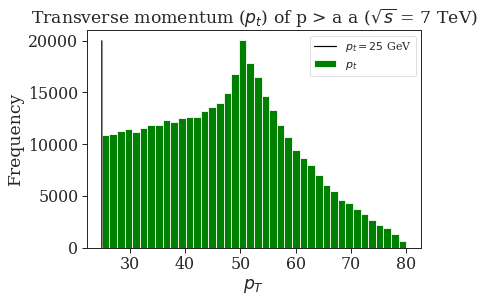

In [30]:
#Transverse momentum of p > a a (sqrt(s) = 7 TeV), cross_section = 2.258 pb
p_T1 = pT('pp2aa_7TeV.lhe')

y = np.arange(0,20000,1)
x = 25 + 0*y
plot = plt.plot(x,y,  color = 'black', label = r'$p_t = 25$ GeV')

histogram = plt.hist(p_T1, bins = 40, color = 'green', label = r'$p_t$')

plt.title(r'Transverse momentum ($p_t$) of p > a a ($\sqrt{s}$ = 7 TeV)')
plt.xlabel(r'$p_T$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

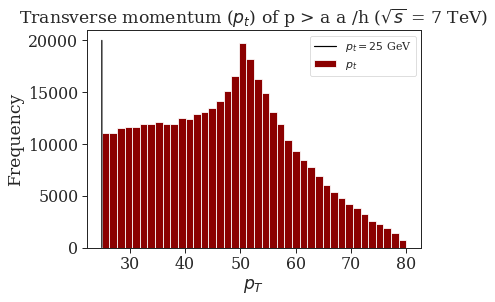

In [31]:
#Transverse momentum of p p > a a without higgs (sqrt(s) = 7 TeV), cross_section = 2.251 pb
p_T1 = pT('pp2aa_nH_7TeV.lhe')

y = np.arange(0,20000,1)
x = 25 + 0*y
plot = plt.plot(x,y,  color = 'black', label = r'$p_t = 25$ GeV')

histogram = plt.hist(p_T1, bins = 40, color = 'darkred', label = r'$p_t$')

plt.title(r'Transverse momentum ($p_t$) of p > a a /h ($\sqrt{s}$ = 7 TeV)')
plt.xlabel(r'$p_T$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

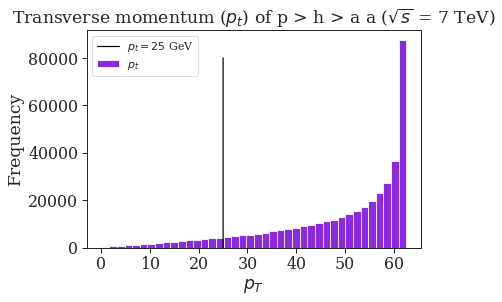

In [32]:
#Transverse momentum of p p > h > a a (sqrt(s) = 7 TeV), cross section = 0.008509 pb
p_T1 = pT('pp2h2aa_7TeV.lhe')

y = np.arange(0,80000,1)
x = 25 + 0*y
plot = plt.plot(x,y,  color = 'black', label = r'$p_t = 25$ GeV')

histogram = plt.hist(p_T1, bins = 40, color = 'blueviolet', label = r'$p_t$')

plt.title(r'Transverse momentum ($p_t$) of p > h > a a ($\sqrt{s}$ = 7 TeV)')
plt.xlabel(r'$p_T$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

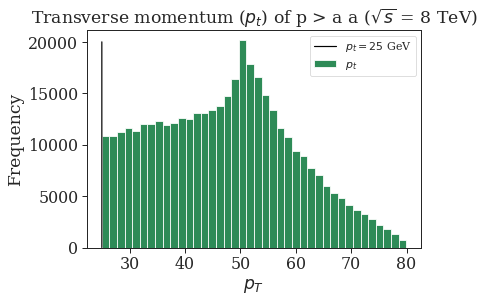

In [33]:
#Transverse momentum of p p > a a (sqrt(s) = 8 TeV), cross section =  2.503 pb
p_T1 = pT('pp2aa_8TeV.lhe')

y = np.arange(0,20000,1)
x = 25 + 0*y
plot = plt.plot(x,y,  color = 'black', label = r'$p_t = 25$ GeV')

histogram = plt.hist(p_T1, bins = 40, color = 'seagreen', label = r'$p_t$')

plt.title(r'Transverse momentum ($p_t$) of p > a a ($\sqrt{s}$ = 8 TeV)')
plt.xlabel(r'$p_T$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

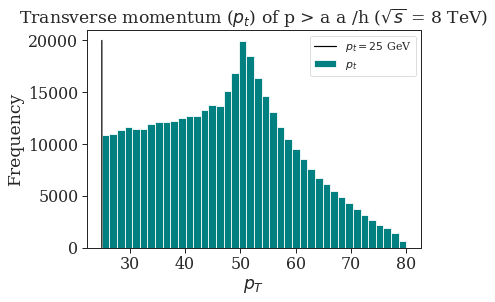

In [34]:
#Transverse momentum of p p > a a without higgs (sqrt(s) = 8 TeV), cross_section = 2.495 pb
p_T1 = pT('pp2aa_nH_8TeV.lhe')

y = np.arange(0,20000,1)
x = 25 + 0*y
plot = plt.plot(x,y,  color = 'black', label = r'$p_t = 25$ GeV')

histogram = plt.hist(p_T1, bins = 40, color = 'teal', label = r'$p_t$')

plt.title(r'Transverse momentum ($p_t$) of p > a a /h ($\sqrt{s}$ = 8 TeV)')
plt.xlabel(r'$p_T$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()

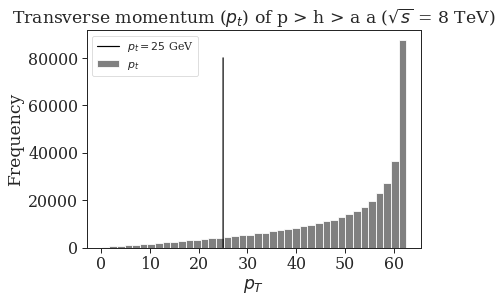

In [35]:
#Transverse momentum of p p > h > a a (sqrt(s) = 8TeV), cross section = 0.01097 pb
p_T1 = pT('pp2h2aa_8TeV.lhe')

y = np.arange(0,80000,1)
x = 25 + 0*y
plot = plt.plot(x,y,  color = 'black', label = r'$p_t = 25$ GeV')

histogram = plt.hist(p_T1, bins = 40, color = 'grey', label = r'$p_t$')

plt.title(r'Transverse momentum ($p_t$) of p > h > a a ($\sqrt{s}$ = 8 TeV)')
plt.xlabel(r'$p_T$')
plt.ylabel('Frequency')
plt.legend(fontsize = 11)
plt.show()